<a href="https://colab.research.google.com/github/jamesgcastrof/Retorno-Acumulado-Acoes-2022/blob/main/Retorno_Acumulado_Acoes_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import
Importar as bibliotecas necessárias para obter e manipular os dados das ações, como pandas, yfinance, matplotlib e plotly.

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Definir os tickers das ações
Definir os tickers das ações que serão analisadas, no caso PETR4.SA, VALE3.SA e ITUB4.SA, que são empresas brasileiras de petróleo, mineração e banco, respectivamente.

In [9]:
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA"]

# Definir o período de análise
Definir o período de análise, que é o ano de 2022, desde o início até o fim do ano.

In [10]:
inicio = "2022-01-01"
fim = "2022-12-31"

# Obter os dados das ações e Criar um DataFrame com os dados
Obter os dados das ações do Yahoo Finance usando a função yf.download, que retorna um DataFrame com os preços de abertura, fechamento, máximo, mínimo e ajustado, além do volume negociado de cada ação.

In [26]:
dados = yf.download(tickers, start=inicio, end=fim)
df = pd.DataFrame(dados)

[*********************100%%**********************]  3 of 3 completed


# Calcular o retorno diário das ações

Calcular o retorno diário das ações usando a coluna ‘Adj Close’, que representa o preço de fechamento ajustado por dividendos e desdobramentos. O retorno diário é a variação percentual do preço de um dia para o outro.

In [18]:
retorno = dados['Adj Close'].pct_change()

# Tratar valores negativos ou nulos antes de calcular o retorno acumulado

Tratar valores negativos ou nulos no retorno diário, substituindo-os por zero. Isso evita erros na hora de calcular o retorno acumulado.

*A função fillna do pandas é usada para tratar valores nulos nos dados, substituindo-os pela média dos retornos.*

In [40]:
retorno.fillna(0, inplace=True)

# Calcular o retorno acumulado das ações

Calcular o retorno acumulado das ações, que é o produto dos retornos diários. O retorno acumulado representa a variação percentual do preço desde o início do período até uma determinada data.

*A função cumprod do pandas é usada para calcular o produto cumulativo dos retornos, que é o retorno acumulado.*

In [39]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1

Definir as cores para cada ação, usando um dicionário que associa cada ticker a uma cor. Isso facilita a identificação das ações nos gráficos.

In [37]:
# Definir as cores para cada ação
cores = {'PETR4.SA': 'blue', 'VALE3.SA': 'red', 'ITUB4.SA': 'green'}

Este código salva o DataFrame retorno_acumulado em um arquivo chamado “retorno_acumulado.xlsx”. Você pode abrir este arquivo no Excel para visualizar os dados

In [ ]:
# Salvar o DataFrame em um arquivo Excel
retorno_acumulado.to_excel("retorno_acumulado.xlsx")

print(retorno_acumulado)


Este código é uma representação visual do retorno acumulado de três ações diferentes - PETR4.SA, VALE3.SA e ITUB4.SA - no primeiro semestre de 2022.

Primeiro, ele define as cores para cada ação. Em seguida, cria uma figura usando a biblioteca matplotlib, especificando o tamanho da figura.

Para cada ação (ticker), o código plota o retorno acumulado dessa ação ao longo do tempo, usando a cor correspondente definida anteriormente.

O título do gráfico é ‘Retorno Acumulado no Primeiro Semestre de 2022’, e os rótulos dos eixos x e y são ‘Data’ e ‘Retorno Acumulado’, respectivamente.

O código também adiciona uma legenda ao gráfico, que mostra quais cores correspondem a quais ações.

Por fim, o gráfico é exibido com uma grade para facilitar a leitura.

Este gráfico fornece uma visão clara de como o valor de cada ação mudou ao longo do tempo, permitindo comparações diretas entre as três ações.

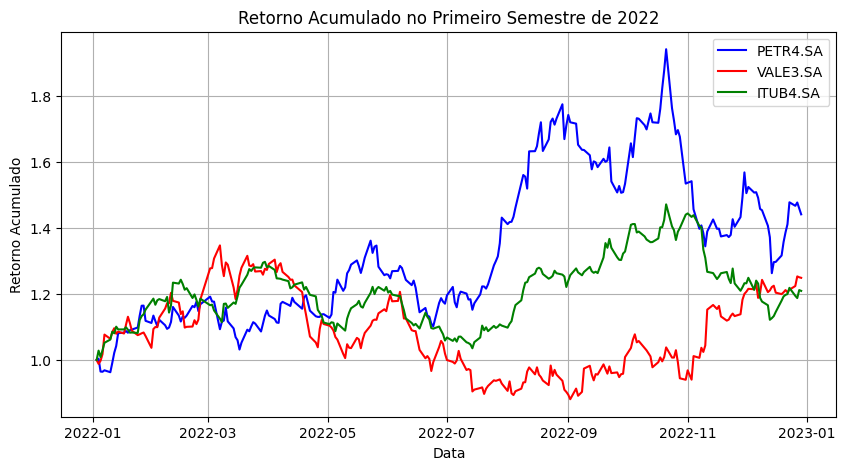

In [41]:
# Criar um único gráfico para todas as ações
plt.figure(figsize=(10,5))
for ticker in tickers:
    plt.plot(retorno_acumulado[ticker], color=cores[ticker], label=ticker)
plt.title('Retorno Acumulado no Primeiro Semestre de 2022')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()


O código cria um gráfico de barras para mostrar o retorno total de cada ação. O eixo x do gráfico representa as ações e o eixo y representa o retorno total. Cada barra no gráfico corresponde a uma ação e sua altura indica o retorno total da ação. As cores das barras correspondem às cores definidas anteriormente para cada ação.

Este gráfico fornece uma visão clara do desempenho de cada ação durante o ano de 2022, permitindo comparações diretas entre as três ações.

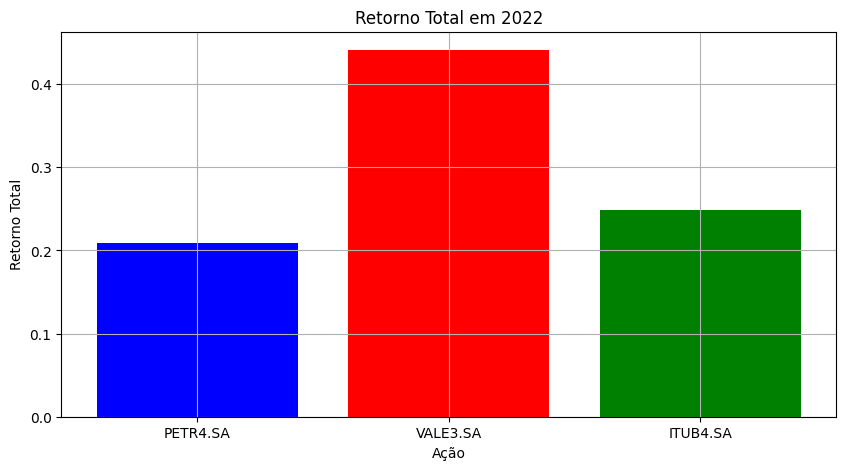

In [42]:
# Calcular o retorno total no final do período para cada ação
retorno_total = retorno_acumulado.iloc[-1] - 1

# Gráfico de barras para mostrar o retorno total de cada ação
plt.figure(figsize=(10,5))
plt.bar(tickers, retorno_total, color=[cores[ticker] for ticker in tickers])
plt.title('Retorno Total em 2022')
plt.xlabel('Ação')
plt.ylabel('Retorno Total')
plt.grid(True)
plt.show()


Este código cria um gráfico interativo para visualizar o retorno acumulado das ações PETR4.SA, VALE3.SA e ITUB4.SA ao longo do ano de 2022.

Primeiro, ele cria uma figura vazia usando a biblioteca Plotly. Em seguida, para cada ação (ticker), ele adiciona um traço ao gráfico que representa o retorno acumulado da ação ao longo do tempo. O eixo x do gráfico é a data e o eixo y é o retorno acumulado.

O código também atualiza o layout do gráfico para adicionar um título e rótulos aos eixos x e y. O título do gráfico é ‘Retorno Acumulado em 2022’, o rótulo do eixo x é ‘Data’ e o rótulo do eixo y é ‘Retorno Acumulado’.

Por fim, o gráfico é exibido. Como é um gráfico interativo, você pode ampliar, reduzir e mover o gráfico para explorar os dados em detalhes.
Primeiro, ele cria uma figura vazia usando a biblioteca Plotly. Em seguida, para cada ação (ticker), ele adiciona um traço ao gráfico que representa o retorno acumulado da ação ao longo do tempo. O eixo x do gráfico é a data e o eixo y é o retorno acumulado.

O código também atualiza o layout do gráfico para adicionar um título e rótulos aos eixos x e y. O título do gráfico é ‘Retorno Acumulado em 2022’, o rótulo do eixo x é ‘Data’ e o rótulo do eixo y é ‘Retorno Acumulado’.

Por fim, o gráfico é exibido. Como é um gráfico interativo, você pode ampliar, reduzir e mover o gráfico para explorar os dados em detalhes.

In [30]:
# Criar um gráfico interativo
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(x=retorno_acumulado.index, y=retorno_acumulado[ticker], mode='lines', name=ticker))

fig.update_layout(title='Retorno Acumulado em 2022', xaxis_title='Data', yaxis_title='Retorno Acumulado')

fig.show()


Este código é uma implementação modularizada para baixar dados de ações, calcular o retorno diário e acumulado, e criar um gráfico interativo para visualizar esses retornos. Aqui está uma explicação detalhada de cada parte do código:

O eixo y do gráfico representa o “Retorno Acumulado” das ações. O retorno acumulado é uma medida de quanto o valor de um investimento aumentou ao longo de um período de tempo. Ele é calculado multiplicando os retornos diários das ações.

Por exemplo, se o retorno acumulado de uma ação é 1.2 no final do período, isso significa que o valor da ação aumentou 20% em relação ao seu valor inicial. Se o retorno acumulado for 0.8, isso significa que o valor da ação diminuiu 20%.

Portanto, quanto maior o valor no eixo y, maior é o retorno acumulado da ação e, consequentemente, melhor foi seu desempenho durante o período analisado.

In [34]:
def baixar_dados(tickers, inicio, fim):
    """
    Baixa os dados das ações do Yahoo Finance.
    """
    dados == dados
    return dados

def calcular_retorno(dados):
    """
    Calcula o retorno diário e o retorno acumulado das ações.
    """
    retorno == retorno
    retorno.fillna(0, inplace=True)
    retorno_acumulado = (1 + retorno).cumprod()
    retorno_acumulado.iloc[0] = 1
    return retorno_acumulado

def criar_grafico(retorno_acumulado, tickers):
    """
    Cria um gráfico interativo do retorno acumulado das ações.
    """
    fig = go.Figure()
    for ticker in tickers:
        fig.add_trace(go.Scatter(x=retorno_acumulado.index,
                                 y=retorno_acumulado[ticker],
                                 mode='lines',
                                 name=ticker))
    fig.update_layout(title='Retorno Acumulado em 2022',
                      xaxis_title='Data',
                      yaxis_title='Retorno Acumulado')
    fig.show()

# Criar o gráfico interativo
criar_grafico(retorno_acumulado, tickers)
